# Customer Segmentation

In marketing, market segmentaion is the process of dividing a broad consumer or business market, normally consisting of exisisting and potential customers, into sub-groups of consumers based on some type of shared characteristics.

**Contents:**
- Importing Libraries
- EDA
- Data Preprocessing
- Model Building

## Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [17]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## EDA

### Checking for Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [6]:
# Only numerical variables
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


### Checking for column names

In [9]:
col = df.columns
col

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

### Checking missing values

In [11]:
df.shape

(8068, 11)

In [10]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Since the amount of missing value is relatively small, I will drop the missing values where its amount is less than 5% of the total dataset.

For 'Work_Experience', which consists of 10% of the total amount, I will fill them with the median value. 

In [18]:
median_work_experience = df['Work_Experience'].median()
df['Work_Experience'].fillna(median_work_experience, inplace=True)

In [19]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Distribution of dataset

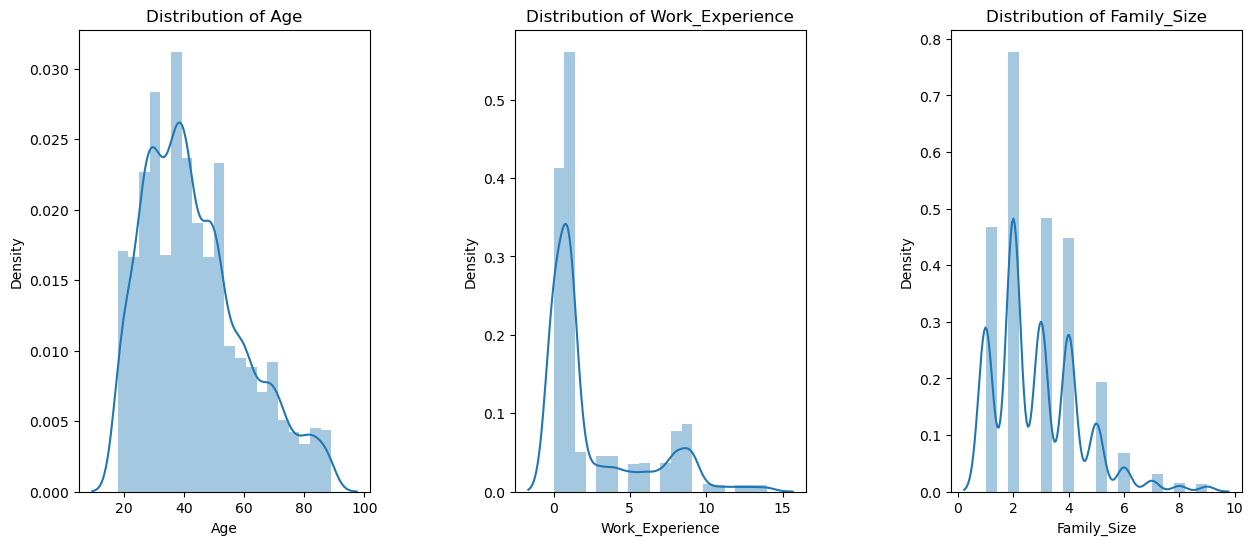

In [25]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Work_Experience', 'Family_Size']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution of {}'.format(x))
plt.show()

In [27]:
# check for segmentation columns
df.groupby('Segmentation')[['Age', 'Work_Experience', 'Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.702294,2.707890,2.434247
B,48.011501,2.259919,2.695227
C,49.268817,2.132258,2.970968
D,33.204523,2.763317,3.235678


<Axes: xlabel='Segmentation'>

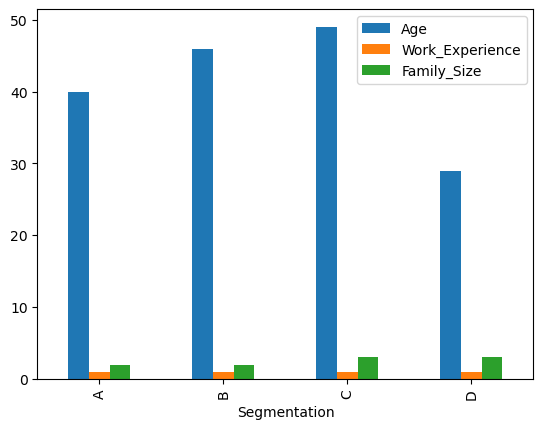

In [34]:
df.groupby('Segmentation')[['Age', 'Work_Experience', 'Family_Size']].agg('median').plot(kind = 'bar')

In [31]:
df.groupby('Gender')[['Age', 'Work_Experience', 'Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.123105,2.654942,2.749848
Male,43.862678,2.324179,2.926189


<Axes: ylabel='Gender'>

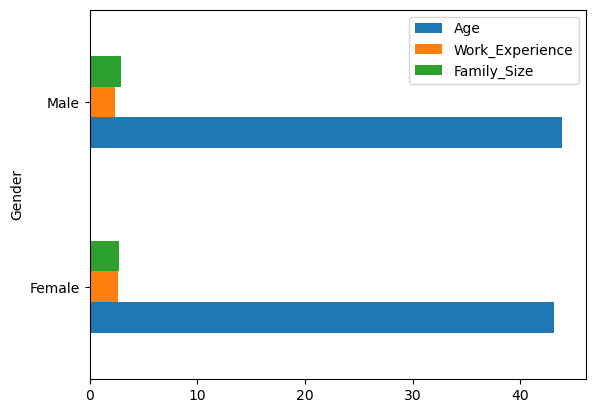

In [32]:
df.groupby('Gender')[['Age', 'Work_Experience', 'Family_Size']].agg('mean').plot(kind = 'barh')

In [42]:
# check for profession by gender
df.groupby(['Profession', 'Gender'])[['Gender']].count()

Gender
Profession    Gender        
Artist        Female    1146
              Male      1239
Doctor        Female     280
              Male       366
Engineer      Female     518
              Male       131
Entertainment Female     231
              Male       650
Executive     Female      27
              Male       539
Healthcare    Female     496
              Male       712
Homemaker     Female     169
              Male        38
Lawyer        Female     287
              Male       284
Marketing     Female     144
              Male       119

In [43]:
# check the spending score by Gender
df.groupby(['Gender', 'Spending_Score'])[['Spending_Score']].count()

Spending_Score
Gender Spending_Score                
Female Average                    773
       High                       448
       Low                       2077
Male   Average                   1071
       High                       683
       Low                       2324

<Axes: ylabel='Gender,Spending_Score'>

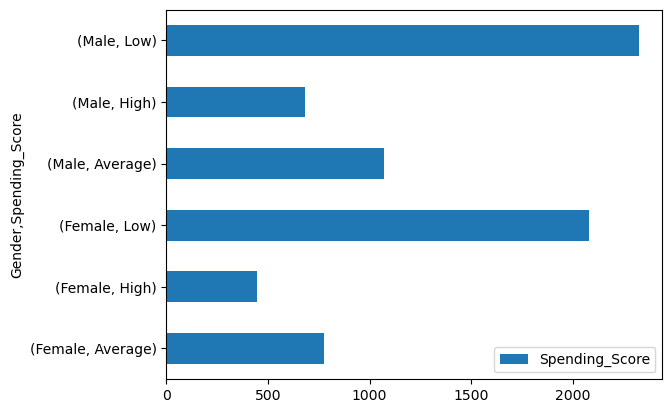

In [45]:
df.groupby(['Gender', 'Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

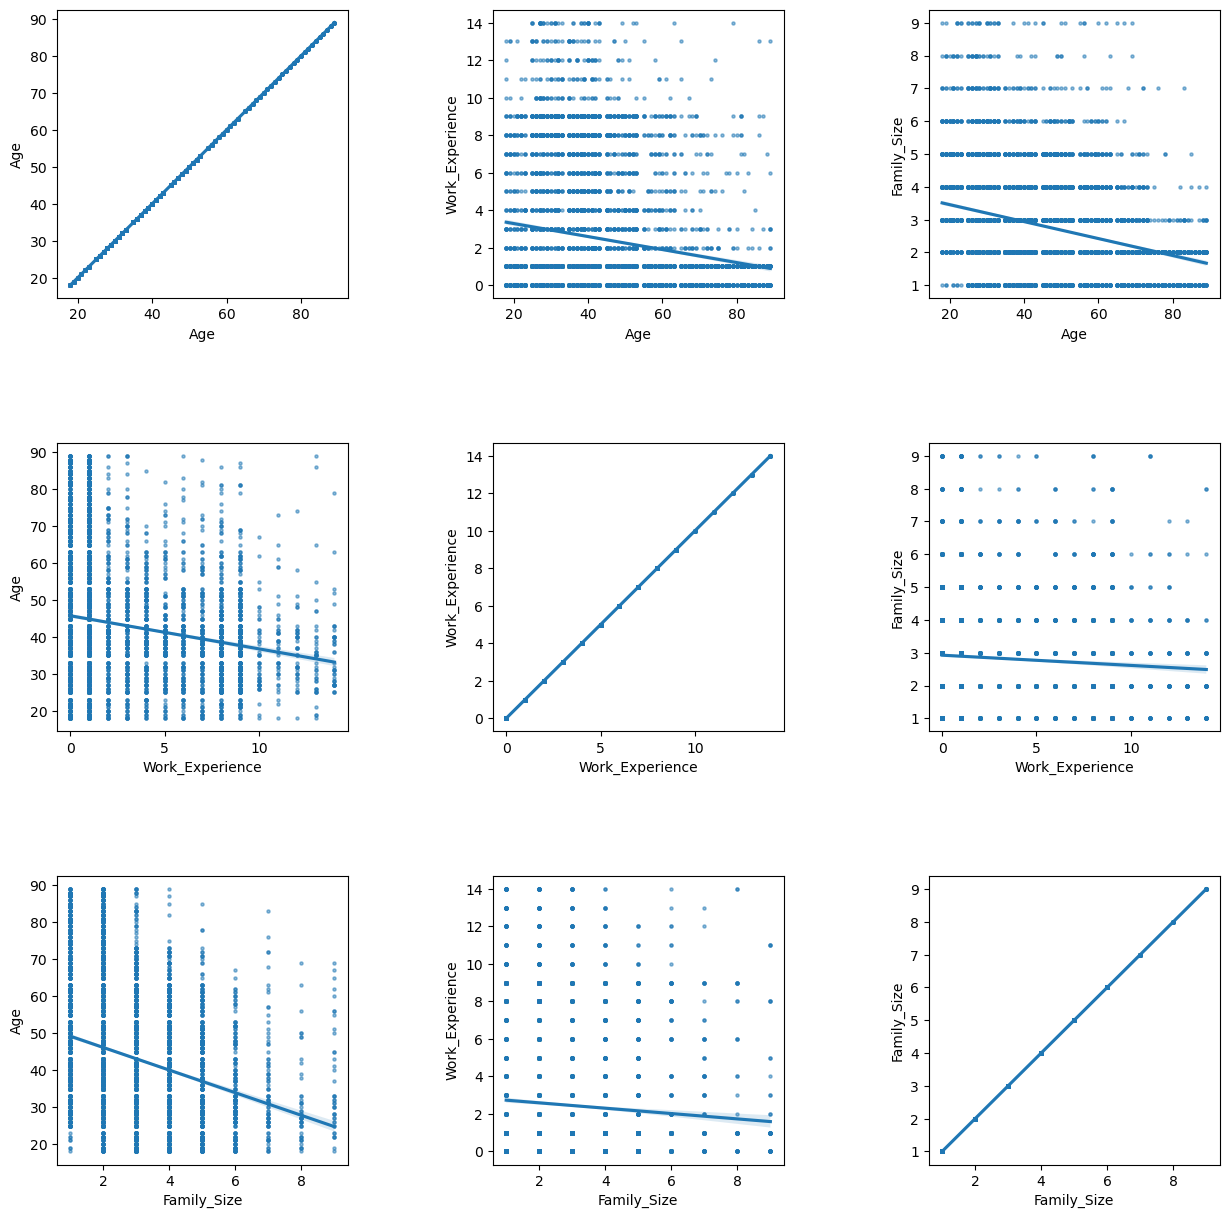

In [51]:
plt.figure(1, figsize = (15, 15))
n = 0
for x in ['Age', 'Work_Experience', 'Family_Size']:
    for y in ['Age', 'Work_Experience', 'Family_Size']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha': 0.5, 's': 5})
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)
plt.show()

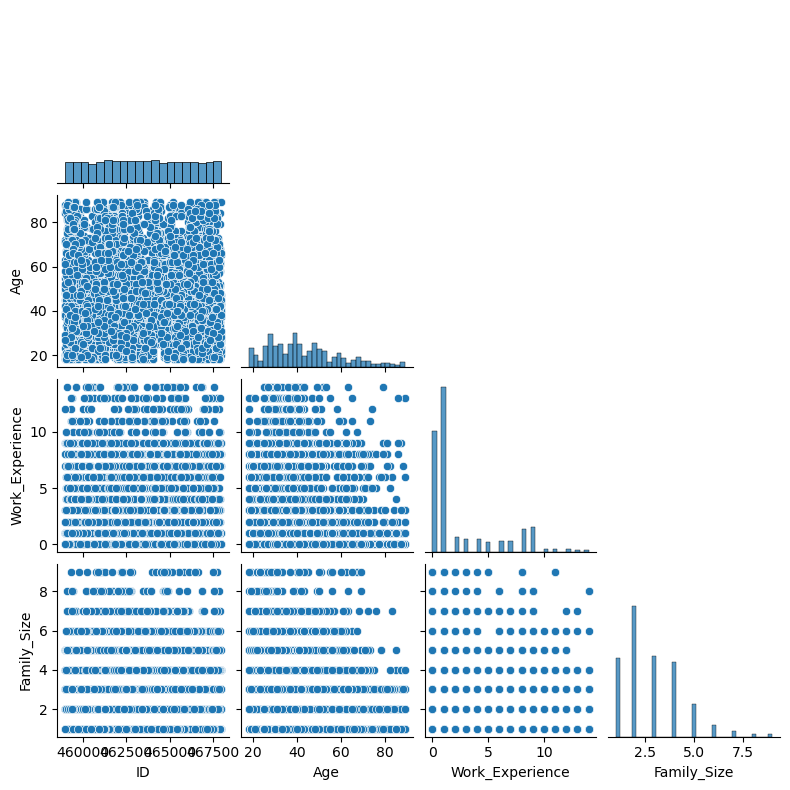

In [61]:
sns.pairplot(df, corner=True, height=2)

### checking for correlation

<Axes: >

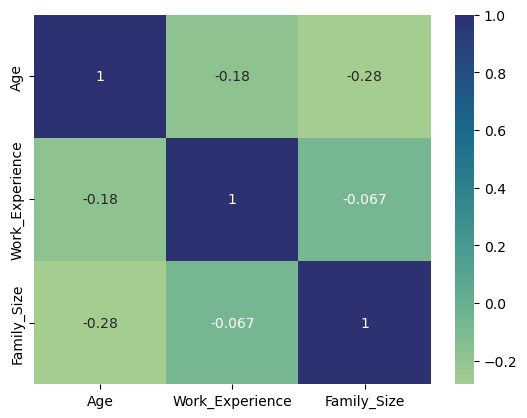

In [62]:
sns.heatmap(df[['Age', 'Work_Experience', 'Family_Size']].corr(), annot=True, cmap="crest")

## Data Prepcocessing

### One-hot Encoding

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7376 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7376 non-null   int64  
 1   Gender           7376 non-null   object 
 2   Ever_Married     7376 non-null   object 
 3   Age              7376 non-null   int64  
 4   Graduated        7376 non-null   object 
 5   Profession       7376 non-null   object 
 6   Work_Experience  7376 non-null   float64
 7   Spending_Score   7376 non-null   object 
 8   Family_Size      7376 non-null   float64
 9   Var_1            7376 non-null   object 
 10  Segmentation     7376 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 691.5+ KB


In [64]:
categorical_var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df, columns=categorical_var)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


### Using Label encoder to encode Segmentation column

In [65]:
# This transformer should be used to encode target values, i.e. y
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])

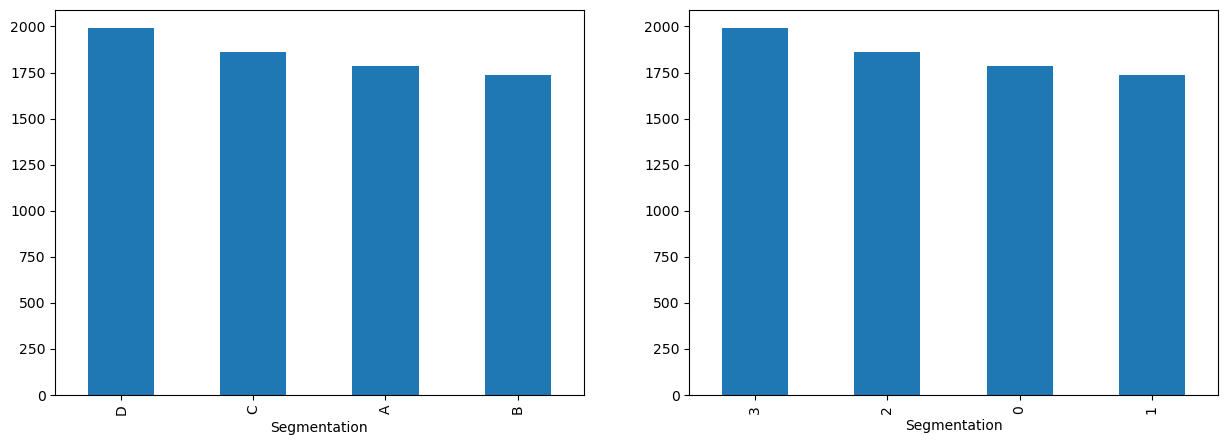

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1, 2, 2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

## Model Building

In [70]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

### Segmenting using Age and Family Size

In [72]:
X = df[['Age', 'Family_Size']].iloc[:, :].values  # Use : to select all rows and columns
# By appending .values to the DataFrame indexing operation, you convert the selected subset of the DataFrame into a NumPy array. 
# This is often done when you need to input data into machine learning models, which typically expect data in the form of arrays rather than DataFrames.
X

array([[22.,  4.],
       [38.,  3.],
       [67.,  1.],
       ...,
       [33.,  1.],
       [27.,  4.],
       [37.,  3.]])

In [73]:
inertia = []  # Inertia is a metric used to evaluate the quality of the clusters formed by the K-means algorithm. 
              # It represents the total sum of the squared distances between each data point and the centroid of its cluster. A lower inertia value indicates better clustering.

# init='k-means++: his is the initialization method. The 'k-means++' method selects initial cluster centers in a smart way to speed up convergence.
# n_init=10: The algorithm will run with different centroid seeds 10 times, and the final results will be the best output of these runs in terms of inertia.
# max_iter=300: The maximum number of iterations for a single run of the algorithm.
# tol=0.0001: The tolerance to declare convergence, i.e., the algorithm stops if the centroids do not move significantly (as defined by this value).
# algorithm='elkan': This specifies the algorithm to use for computation. The 'elkan' variation is usually more efficient for datasets with a large number of samples.

for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                      tol=0.0001, random_state=111, algorithm='elkan') 
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

In [ ]:
# An "iteration" in the context of the K-means algorithm typically involves two main steps:

# Assignment Step: Each data point is assigned to the nearest cluster center (centroid). The 'nearest' cluster is determined based on the distance between the data point and the cluster centers. This distance is usually calculated using the Euclidean distance, though other distance measures can be used depending on the specific application.
# Update Step: After all data points have been assigned to clusters, the centroids of these clusters are recalculated. This is typically done by taking the mean of all data points that have been assigned to each cluster.

# These two steps are repeated iteratively. After each iteration, the centroids move (as they are recalculated based on the current assignments of data points), and data points might get reassigned to different clusters based on these new centroids.

# The algorithm stops iterating and is considered to have converged in any of the following conditions:
# The maximum number of iterations (max_iter) is reached.
# The centroids do not change significantly between successive iterations, within a specified tolerance level (as set by the tol parameter).
# Setting max_iter=300 means that the algorithm will perform at most 300 iterations of these assignment and update steps for a single run, unless it converges (centroids stabilize) before reaching this limit. This parameter is crucial to prevent the algorithm from running indefinitely, especially in cases where it might not converge quickly.

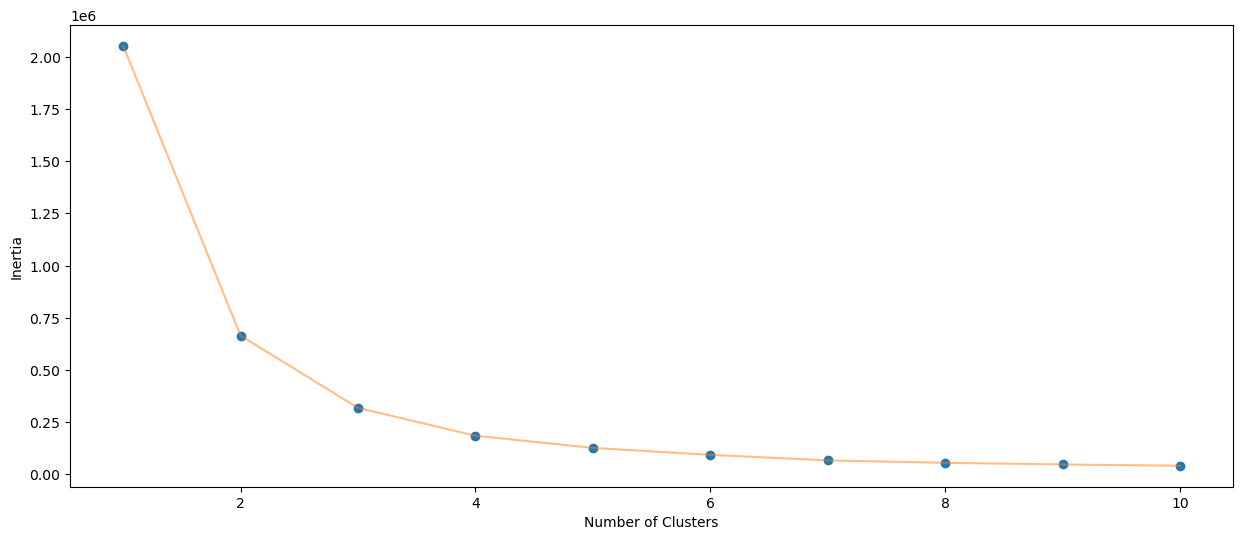

In [74]:
plt.figure(1, figsize=(15, 6)) # (1, figsize=(15, 6)) specifies the figure number as 1 
plt.plot(np.arange(1, 11), inertia, 'o') # np.arange(1, 11) generates a sequence of numbers from 1 to 10 (since Python ranges are exclusive at the upper end), representing the number of clusters.
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5) # This command plots the same points as the previous line but connects them with a line ('-').
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [75]:
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, 
                      tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X)
labels2 = algorithm.labels_  # These labels are integers from 0 to 4 (since there are 5 clusters), indicating which cluster each sample in X has been assigned to.
centroids = algorithm.cluster_centers_  # This line extracts the coordinates of the centroids of the clusters.

In [76]:
centroids

array([[25.43982169,  3.50916295],
       [64.82475248,  2.48217822],
       [50.17815022,  2.8336437 ],
       [37.80035103,  2.64370338],
       [81.55798687,  1.79431072]])

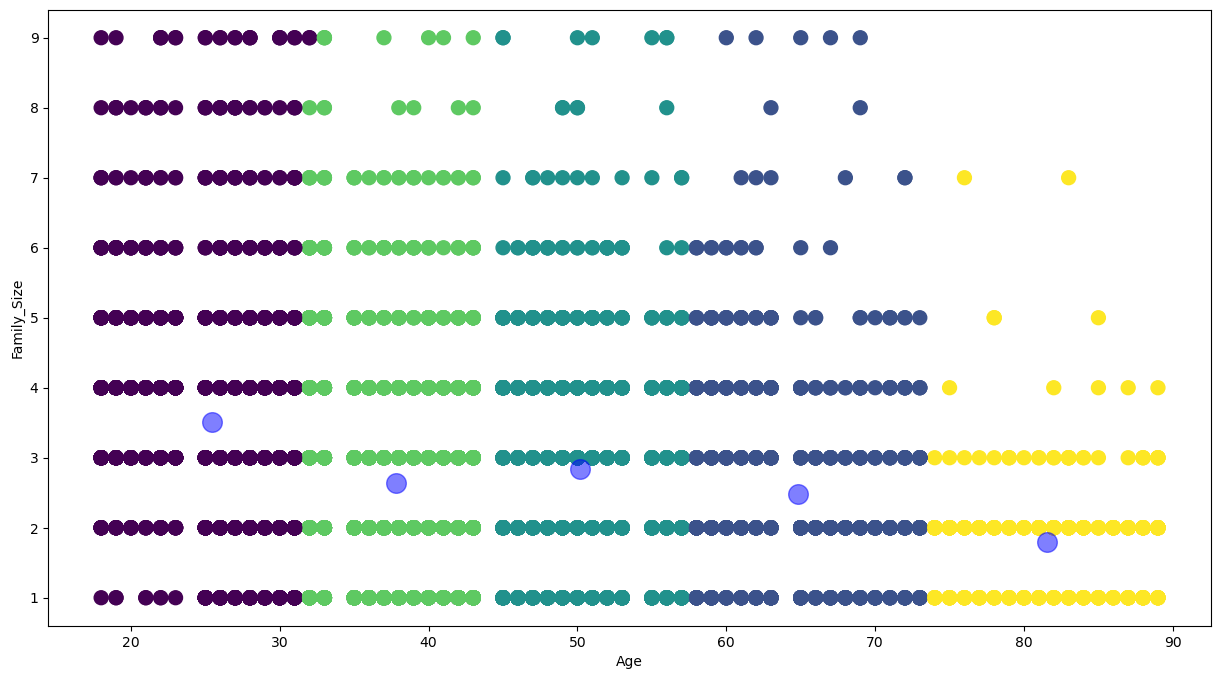

In [82]:
# c=labels2: This sets the color of each point based on the clustering labels (labels2) obtained from the KMeans algorithm. Different colors will represent different clusters.
# s=200: This sets the size of the markers (data points) to 200.

plt.figure(1, figsize=(15, 8))
plt.scatter(x='Age', y='Family_Size', data=df, c=labels2, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=200, c='blue', alpha=0.5)
plt.ylabel('Family_Size')
plt.xlabel('Age')
plt.show()